# Load

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import os

In [3]:
cd C:\Users\ASUS RYZEN\AnacondaJupyter\ML_Praktikum\Modul5

C:\Users\ASUS RYZEN\AnacondaJupyter\ML_Praktikum\Modul5


In [4]:
{"username":"huseinabdulh","key":"e953505bd13b6491beac8d1916f15533"}

{'username': 'huseinabdulh', 'key': 'e953505bd13b6491beac8d1916f15533'}

In [5]:
'''od.download('https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset')'''

"od.download('https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset')"

In [6]:
import os
base_dataset = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database'
class_dir = ['Normal','Tuberculosis']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

In [7]:
dataset_awal ='C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database'


print('Number of classes: {}'.format(len(os.listdir(dataset_awal))))

print('')

normal = len(os.listdir(dataset_awal+'/Normal'))
tbc= len(os.listdir(dataset_awal+'/Tuberculosis'))

print("DATASET AWAL ")
print('Normal : ', normal)
print('TBC : ', tbc)

Number of classes: 2

DATASET AWAL 
Normal :  3500
TBC :  700


In [8]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


'C:\Users\ASUS' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
'''import splitfolders

base_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"
data_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted"
splitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8 ,.1 ,.1),group_prefix=None)'''

'import splitfolders\n\nbase_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"\ndata_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted"\nsplitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8 ,.1 ,.1),group_prefix=None)'

In [10]:
#Define a path
base_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_normal_dir = os.path.join(train_dir, 'Normal')
train_tuber_dir = os.path.join(train_dir, 'Tuberculosis')

validation_normal_dir = os.path.join(validation_dir, 'Normal')
validation_tuber_dir = os.path.join(validation_dir, 'Tuberculosis')

test_normal_dir = os.path.join(test_dir, 'Normal')
test_tuber_dir = os.path.join(test_dir, 'Tuberculosis')

In [11]:
print('Jumlah data train normal :', len(os.listdir(train_normal_dir)))
print('Jumlah data train tuber :',len(os.listdir(train_tuber_dir)))
print()
print('Jumlah data validation normal  :',len(os.listdir(validation_normal_dir)))
print('Jumlah data validation tuber :',len(os.listdir(validation_tuber_dir)))
print('')
print('Jumlah data test normal  :',len(os.listdir(test_normal_dir)))
print('Jumlah data test puber :',len(os.listdir(test_tuber_dir)))

Jumlah data train normal : 2800
Jumlah data train tuber : 560

Jumlah data validation normal  : 350
Jumlah data validation tuber : 70

Jumlah data test normal  : 350
Jumlah data test puber : 70


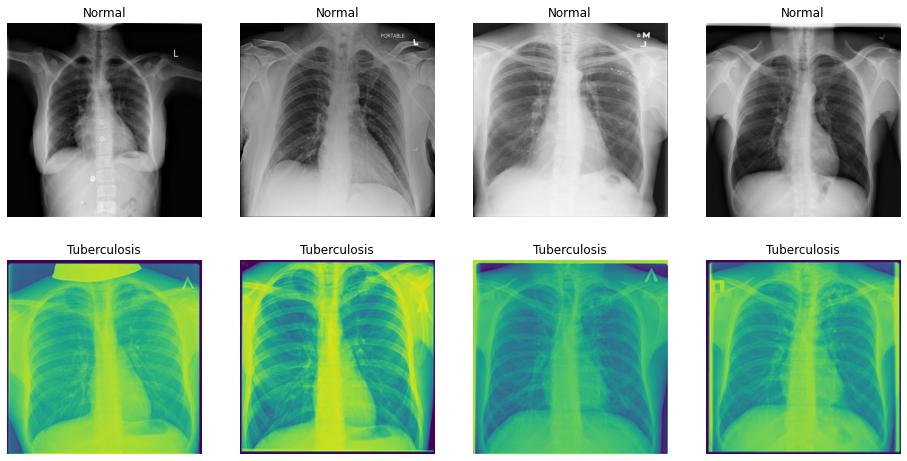

In [12]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 
#pip install matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8
normal_img = [os.path.join(train_normal_dir, fname) 
                for fname in os.listdir(train_normal_dir)[pic_index-4:pic_index]]
tuberculosis_img  = [os.path.join(train_tuber_dir, fname) 
                for fname in os.listdir(train_tuber_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(normal_img+tuberculosis_img):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

# Preprocessing

In [13]:
!pip3 install keras
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import random

In [14]:
TRAINING_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted/train"
VALIDATION_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted/val"
TEST_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted/test"

In [15]:
height = 100
width = 100
batch_size = 32

# Preprocessing Khusus Noise

In [17]:
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    #np.clip(img, 0., 255.)
    return img

In [33]:
#Testing Generator Both
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      #shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      preprocessing_function=add_noise,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')


test_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')


Found 3360 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 420 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


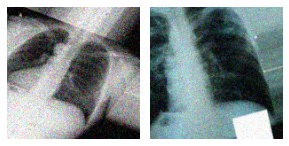

In [34]:
#tampilkan Data Generator Khusus add_noise
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 15))
for i in range(2):
    plt.subplot(5, 10, i + 1)
    
    for X, y in train_generator:

        plt.imshow(X[0])
        plt.axis("off")
        break
        
plt.tight_layout()
plt.show()

# Modelling

https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [35]:
# IMPORT SEMUA PAKET YANG ANDA PERLUKAN UNTUK MENDEFINISIKAN MODEL DISINI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,InputLayer, Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [36]:
from tensorflow.keras.applications.vgg16 import VGG16

In [37]:
baseModel = VGG16(input_shape = (150,150,3),
                           include_top = False,
                           weights = "imagenet")
baseModel.trainable = False

In [38]:
baseModel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Bisa dilihat di model.summary() di atas, InceptionV3 memiliki banyak layer pada Feature Extraction Layer-nya. Serta memiliki 21.8 juta parameter yang harus ditrain. Akan tetapi, disini kita akan menggunakan bobot default milik VGG16. Bobot ini telah dilatih sebelumnya menggunakan dataset 'imagenet'. Dataset ini berisi kumpulan data image yang jumlahnya jutaan. Sehingga, kita tidak perlu melatihnya kembali.

Berikutnya, kita akan mendefinisikan Fully Conected Layer kita sendiri. Layer ini nantinya akan kita pasangkan dengan Feature Extraction Layer milik INCEPTIONV3

In [39]:
class FCHeadNet:
    def build(baseModel, classes, D):
        headModel = baseModel.output
        headModel = Flatten(name="flatten")(headModel)
        headModel = Dense(D, activation='elu')(headModel)
        headModel = Dropout(0.5)(headModel)
        headModel = Dense(classes, activation='softmax')(headModel)
        return headModel

In [40]:
headModel = FCHeadNet.build(baseModel, 2, 100)
model = Model(inputs=baseModel.input, outputs=headModel)

agar nantinya model hanya perlu melakukan train pada bobot yang terdapat pada Fully Connected Layer, maka kita perlu membekukan (Freeze) Feature Extraction Layer milik InceptionV3 menggunakan code di bawah

In [41]:
for layer in baseModel.layers:
    layer.trainable = False

In [42]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [43]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=1e-3), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [44]:
# setting Callback so we can save the best model in format h5 and i save it in my drive
callbacks = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')        
direc = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/Saved_Model/V3_VGG16.h5'
best_model = ModelCheckpoint(direc, monitor='val_acc', verbose = 1, save_best_only = True)

In [45]:
H = model.fit(train_generator,
              epochs=150,
              steps_per_epoch=10,  # images = batch_size * steps
              verbose=1,
              validation_data=validation_generator,
              callbacks=[callbacks, best_model])

Epoch 1/150
10/10 [==============================] - 87s 9s/step - loss: 0.8631 - acc: 0.7954 - val_loss: 0.3203 - val_acc: 0.8810

Epoch 00001: val_acc improved from -inf to 0.88095, saving model to C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/Saved_Model\V3_VGG16.h5
Epoch 2/150
10/10 [==============================] - 91s 10s/step - loss: 0.7426 - acc: 0.6782 - val_loss: 0.9388 - val_acc: 0.8333

Epoch 00002: val_acc did not improve from 0.88095
Epoch 3/150
10/10 [==============================] - 88s 9s/step - loss: 0.7753 - acc: 0.8195 - val_loss: 0.2383 - val_acc: 0.8976

Epoch 00003: val_acc improved from 0.88095 to 0.89762, saving model to C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/Saved_Model\V3_VGG16.h5
Epoch 4/150
10/10 [==============================] - 88s 9s/step - loss: 0.3441 - acc: 0.9058 - val_loss: 0.2915 - val_acc: 0.8786

Epoch 00004: val_acc did not improve from 0.89762
Epoch 5/150
10/10 [==============================] - 89s 10s/step - loss

10/10 [==============================] - 91s 10s/step - loss: 0.1634 - acc: 0.9248 - val_loss: 0.1900 - val_acc: 0.9381

Epoch 00042: val_acc did not improve from 0.96667
Epoch 43/150
10/10 [==============================] - 91s 10s/step - loss: 0.2216 - acc: 0.9153 - val_loss: 0.1246 - val_acc: 0.9571

Epoch 00043: val_acc did not improve from 0.96667
Epoch 44/150
10/10 [==============================] - 90s 10s/step - loss: 0.2524 - acc: 0.8918 - val_loss: 0.2593 - val_acc: 0.9190

Epoch 00044: val_acc did not improve from 0.96667
Epoch 45/150
10/10 [==============================] - 92s 10s/step - loss: 0.2604 - acc: 0.8550 - val_loss: 0.2711 - val_acc: 0.9214

Epoch 00045: val_acc did not improve from 0.96667
Epoch 46/150
10/10 [==============================] - 89s 10s/step - loss: 0.1898 - acc: 0.9292 - val_loss: 0.1826 - val_acc: 0.9357

Epoch 00046: val_acc did not improve from 0.96667
Epoch 47/150
10/10 [==============================] - 90s 10s/step - loss: 0.1863 - acc: 0.90

# Plotting

In [46]:
!pip3 install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\asus ryzen\anaconda3\lib\site-packages (1.0.1)


In [47]:
!pip3 install seaborn

In [48]:
!pip3 install numpy
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import cv2

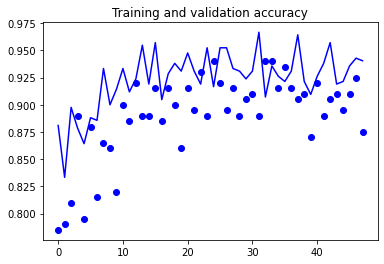

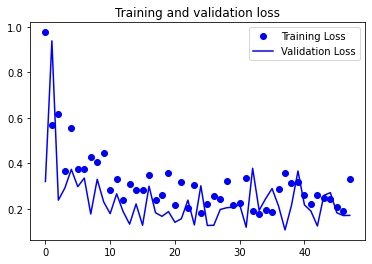

In [49]:
acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
#Print Classification Report
#Print the Target names

target_names = []

for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)

['Normal', 'Tuberculosis']


In [51]:
from sklearn.metrics import classification_report
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

C:\Users\ASUS RYZEN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
              precision    recall  f1-score   support

      Normal       0.83      0.89      0.86       350
Tuberculosis       0.12      0.07      0.09        70

    accuracy                           0.75       420
   macro avg       0.47      0.48      0.47       420
weighted avg       0.71      0.75      0.73       420



In [52]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        shuffle=False,
        class_mode='categorical')

Found 420 images belonging to 2 classes.


In [53]:
import json
from tensorflow.keras.models import load_model
target_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/Saved_Model/'
model_saved = load_model(target_dir +'V3_VGG16.h5')

In [54]:
test_score = model_saved.evaluate_generator(test_generator, test_generator.batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

C:\Users\ASUS RYZEN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 96.43%
[INFO] Loss:  0.10615966469049454


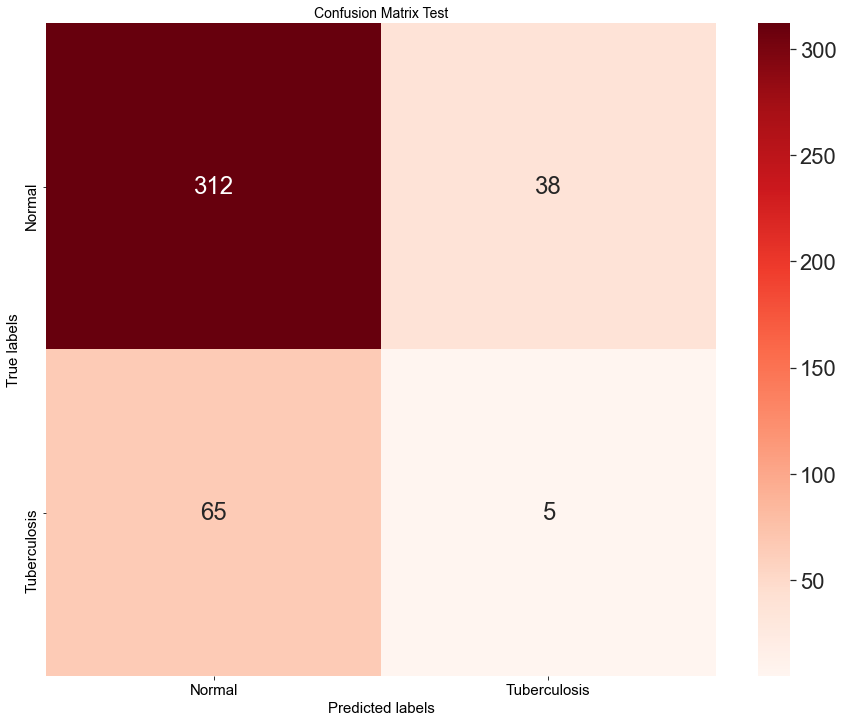

In [55]:
from sklearn.metrics import confusion_matrix
Cmatrix_test = confusion_matrix(test_generator.classes, y_pred)
class_names = test_generator.class_indices

plt.figure(figsize = (15,12))
ax = plt.subplot()
sns.set(font_scale=2.0) # Adjust to fit
sns.heatmap(Cmatrix_test,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)

# labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font)
ax.set_ylabel('True labels', fontdict=label_font) 

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font)

ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()